# Design an App that predicts movie genres and detects spoilers in reviews

Text data can be very challenging to work with. People can speak to each other and grab meaning pretty quickly but it is not the case for computers. In fact, text data need to be encoded and transformed to something that a computer can understand. The process of working with text data is called natural language processing (NLP) and this is exactly what I will be doing in this notebook. 

### Part4: Preprocessing

Author: Sana Krichen    
https://www.linkedin.com/in/sanakrichen/    
https://github.com/skrichen

Import standard packages

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

Let's import my cleaned data

In [152]:
df_cleaned= pd.read_csv(f'/Users/SanaKrichen/Desktop/BrainStation/Capstone Project/df_cleaned.csv')
df_cleaned

,Action,Adventure,Animation,Biography,Comedy,Crime,Documentary,Drama,Family,Fantasy,...,Horror,Music,Musical,Mystery,Romance,SciFi,Sport,Thriller,War,plot
0,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,(The IMDb storyline is incorrect.) On the even...
1,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,"Synopsis Has been Written by Mr Rais Asghar, M..."
2,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,"At a prestigious awards ceremony, the celebrit..."
3,0,0,0,0,0,1,0,1,0,0,...,0,0,0,0,0,0,0,1,0,A group of career criminals including Dix Hand...
4,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,1,THE BIG LIFTThe Soviet Union withdraws from wh...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13250,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,Bitcoin has been called one of the most disrup...
13251,0,0,0,0,1,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,Miss Taylor's wedding to Mr Weston is a sad da...
13252,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,"Cult Cinema presents ""Faces of the Dead"" this ..."
13253,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,"In Japan, Shirai Ryu Grandmaster Hanzo Hasashi..."


In [3]:
# let's check the percentage of every movie genre in this dataset
genre_pcts=(df_cleaned.loc[:, 'Action': 'War'].sum()/df_cleaned.shape[0]).sort_values(ascending=True)

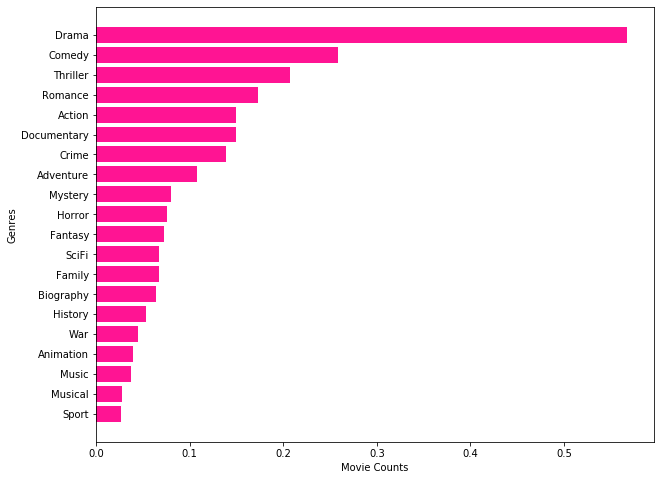

In [4]:
# let's plot the percentage of every genre in my data
plt.figure(figsize=(10,8))
plt.barh(genre_pcts.index, genre_pcts.values, color='deeppink')
plt.xlabel('Movie Counts')
plt.ylabel('Genres')
plt.show()

Recall that the target here is a collection of columns that describe movies genres while the independent variable is the plot of the movie. With the data loaded, we would have to split the columns manually into target and feature.  We also need to divide the data into a training  set, which contains a random group of the data, and a test set, which contains the rest of the data.

In [5]:
# let's locate the target columns
df_cleaned.loc[:, 'Action': 'War']

,Action,Adventure,Animation,Biography,Comedy,Crime,Documentary,Drama,Family,Fantasy,History,Horror,Music,Musical,Mystery,Romance,SciFi,Sport,Thriller,War
0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
2,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0
4,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13250,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
13251,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
13252,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
13253,1,1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0


In [149]:
from sklearn.model_selection import train_test_split
# This is my feature
X=df_cleaned['plot']
# This is my target
y=df_cleaned.loc[:, 'Action':'War']

# split dataset into training and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=123)

I cannot use stratify=y here. It throws me the following error "The least populated class in y has only 1 member, which is too few. The minimum number of groups for any class cannot be less than 2." I guess it is looking at the possible combinations that exists in the target and some of them exist only once so they cannot be both in the train and test sample.

Since I cannot use stratify here, it means that I cannot guarantee to have the same distribution of the labels combinations between the train and test set. In the following, I will at least try to make sure that I have the same distributions of the labels in my train set and test set compared with my original data.

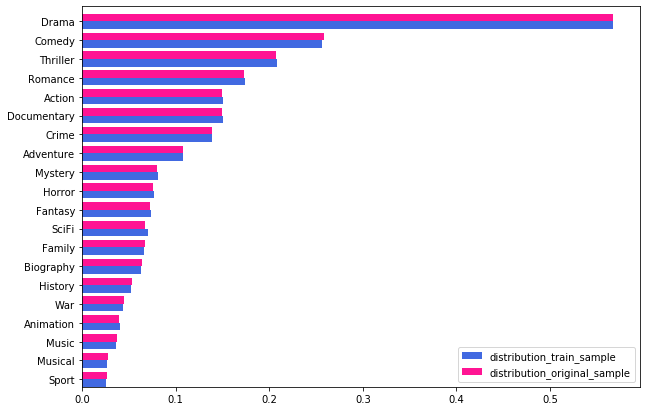

In [7]:
# compare the distribution of the train set with the original data

#compute the percentages of every genre in my train set
genre_pcts_split_train=(y_train.sum()/y_train.shape[0]).sort_values(ascending=True)

# include both the genre percentages of the train set and the original data
to_plot_train = pd.DataFrame({'genres_dist_after_split_train': genre_pcts_split_train,
                         'genres_dist_before_split': genre_pcts}, index=genre_pcts.index)


# make sure that the bar plots share the same label and are next to each other for a better reading of the results
ind = np.arange(len(to_plot_train))
width = 0.4

fig, ax = plt.subplots(figsize=(10,7))
ax.barh(ind, to_plot_train['genres_dist_after_split_train'], width, color='royalblue', label='distribution_train_sample')
ax.barh(ind + width, to_plot_train['genres_dist_before_split'], width, color='deeppink', label='distribution_original_sample')
ax.set(yticks=ind + 0.5*width, yticklabels=to_plot_train.index, ylim=[2*width - 1, len(to_plot_train)])

ax.legend()

plt.show()


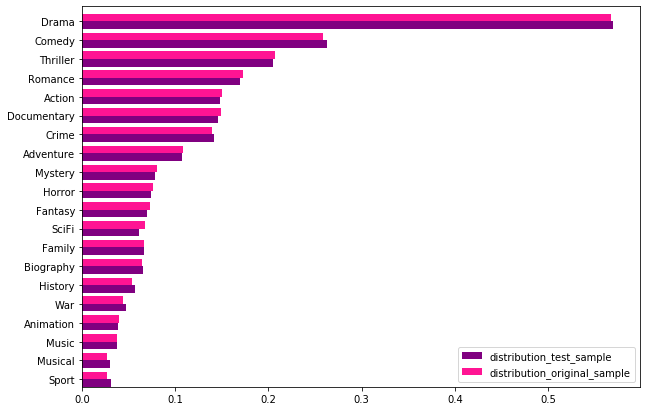

In [8]:
# compare the distribution of the test set with the original data

#compute the percentages of every genre in my test set
genre_pcts_split_test=(y_test.sum()/y_test.shape[0]).sort_values(ascending=True)

# include both the genre percentages of the test set and the original data
to_plot_test = pd.DataFrame({'genres_dist_after_split_test': genre_pcts_split_test,
                         'genres_dist_before_split': genre_pcts}, index=genre_pcts.index)


# make sure that the bar plots share the same label and are next to each other for a better reading of the results
ind = np.arange(len(to_plot_test))
width = 0.4

fig, ax = plt.subplots(figsize=(10,7))
ax.barh(ind, to_plot_test['genres_dist_after_split_test'], width, color='purple', label='distribution_test_sample')
ax.barh(ind + width, to_plot_test['genres_dist_before_split'], width, color='deeppink', label='distribution_original_sample')
ax.set(yticks=ind + 0.5*width, yticklabels=to_plot_test.index, ylim=[2*width - 1, len(to_plot_test)])
ax.legend()

plt.show()


Good enough!! Both the train set and the test set have a pretty close distribution to the original data

It is time to start preprocessing the text of the plots so let's dive into it

The first issue that needs to be addressed is punctuation. In fact all punctuation should be removed and the text should be converted into lower case. I need also to consider removing common stop words (and, or, the, etc.) and words that have numbers in them such as "4th" or "8pm" because they most likely don't contain crucial information. 
I should also apply Lemmatization which is a technique that converts words to their root form (feet -> foot)
In language, we often use variations on the same word or meaning: run, runs, running. These should probably all be coded as the same word. Stemming is one way of doing that by cutting off common word endings such as 's', 'ing' and so on.
All the previously mentioned steps will be included in a function that I will call my_tokenizer. my_tokenizer will accept a sentence as an input and return a list of tokens as an output. I will also write a function that will take this list of tokens, will join them together into a string and return a sentence
.


In [3]:
import nltk
import string
import re


In [4]:
nltk.download('wordnet')
from nltk.stem import WordNetLemmatizer 
lemmatizer = WordNetLemmatizer()
stemmer = nltk.stem.PorterStemmer()
nltk.download('stopwords')

from nltk.corpus import stopwords 
ENGLISH_STOP_WORDS = stopwords.words('english')

def my_tokenizer(sentence):
    
    for punctuation_mark in string.punctuation:
        # Remove punctuation and set to lower case
        sentence = sentence.replace(punctuation_mark,'').lower()

    # split sentence into words
    listofwords = sentence.split(' ')
    list_of_words = []
    
        
    # Remove stopwords and any tokens that are just empty strings or words that include numbers
    for word in listofwords:
        if ((not word in ENGLISH_STOP_WORDS) and (word!='')) and (not re.search("\d", word)):
            # Lemmatize words
            lemmatized_word = lemmatizer.lemmatize(word)
            
            # append the word into the list of listoflemmatized_words
            # in case the word includes the newline \n, we replace with ""
            stemmed_word = stemmer.stem(lemmatized_word)
            list_of_words.append(stemmed_word.replace("\n",''))
            
            
    return list_of_words

[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/SanaKrichen/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/SanaKrichen/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [5]:
# This is a function that takes a list of tokens and return a sentence
def to_string(list_of_words):
    return str(" ".join(list_of_words))
       

In [138]:
# demo after
to_string(my_tokenizer(df_cleaned.loc[0, 'plot']))

'imdb storylin incorrect even inaugur new lord rector lord carshenni edward lexi young woman ada shore dian hart arriv skerryvor univers scotland search longlost uncl joseph tomelti subvers irish poet work anoth name univers gate keeperada mistaken princip sir archibald asher patrick barr new secretari go along imperson asher ada fall love incur disapprov puritan professor hayman duncan macra whose son adolphu charl hawtrey meantim discov delight alcohol womenbas play say jame bridi'

In [136]:
# demo before
df_cleaned.loc[0, 'plot']

'(The IMDb storyline is incorrect.) On the evening of the inauguration of the new Lord Rector, Lord Carshenny, (Edward Lexy) a young woman, Ada Shore, (Diane Hart) arrives at Skerryvore University in Scotland in search of her long-lost uncle (Joseph Tomelty) who was once a subversive Irish poet but is now working under another name as the University Gate Keeper.\nAda is mistaken by the Principal, Sir Archibald Asher, (Patrick Barr) as his new secretary and she goes along with the impersonation. Asher and Ada fall in love which incurs the disapproval of the puritanical Professor Hayman (Duncan Macrae) whose son Adolphus (Charles Hawtrey) is meantime discovering the delights of alcohol and women.\nBased on the play "What Say They?" by James Bridie.'

Ok perfect! That's what I needed...

In a bag-of-words model, we take each word that exists in our corpus, quantify its occurrence in each document, and make a feature matrix with each document a row and each word a column. We can do that using the CountVectorizer() function.


In [13]:
from sklearn.feature_extraction.text import CountVectorizer

In [158]:
# 1. Instantiate CountVectorizer()  and restrict the min of occurrence to 30
bagofwords = CountVectorizer(min_df =30)
print('1. Instantiate ')

 # 2. Fit 
bagofwords.fit(X_train)
print('2. Fit ')

# 3. Transform: 
X_train_bow = bagofwords.transform(X_train)
print('3. Transform X_train')

X_test_bow = bagofwords.transform(X_test)
print('3. Transform X_test')
   


1. Instantiate 
2. Fit 
3. Transform X_train
3. Transform X_test


In [159]:
X_train_bow

<9941x7160 sparse matrix of type '<class 'numpy.int64'>'
	with 1922409 stored elements in Compressed Sparse Row format>

In [161]:
X_test_bow

<3314x7160 sparse matrix of type '<class 'numpy.int64'>'
	with 652333 stored elements in Compressed Sparse Row format>

We can see that the output of the CountVectorizer() from the train set is a sparse matrix of shape 9941x7160. The sparse matrix from the test set has 3314 rows and 7160 columns. That's definitely a lot of columns. My genres are all encoded. Every text plot is transformed into a vector of 7160 columns. At this point, everything is ready for modeling. SO let's put everything together and move on to the next step.

In [162]:
# I need to do this because it is important in the steps of designing my Movie app
import joblib
joblib.dump(bagofwords, "bagofwords.pkl")

['bagofwords.pkl']

In [163]:
y_train

,Action,Adventure,Animation,Biography,Comedy,Crime,Documentary,Drama,Family,Fantasy,History,Horror,Music,Musical,Mystery,Romance,SciFi,Sport,Thriller,War
10584,0,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,1,0
11913,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
4130,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
12061,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0
11323,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5218,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,1,0
12252,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
1346,1,1,0,0,0,0,0,1,0,1,1,0,0,0,0,0,0,0,0,0
11646,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0


In [164]:
# reset the index of my y_train
y_train.reset_index(drop=True)

,Action,Adventure,Animation,Biography,Comedy,Crime,Documentary,Drama,Family,Fantasy,History,Horror,Music,Musical,Mystery,Romance,SciFi,Sport,Thriller,War
0,0,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,1,0
1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
3,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0
4,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9936,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,1,0
9937,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
9938,1,1,0,0,0,0,0,1,0,1,1,0,0,0,0,0,0,0,0,0
9939,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0


In [165]:
# convert the sparse matrix from the train set into a dataframe
df_X_train=pd.DataFrame.sparse.from_spmatrix(X_train_bow, columns=bagofwords.get_feature_names())
df_X_train

,aaron,aback,abandon,abbi,abdomen,abduct,abil,abl,ablaz,aboard,...,youtub,youv,zealand,zero,zip,zoe,zombi,zone,zoo,zoom
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,2,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9936,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9937,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9938,0,0,0,0,0,0,2,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9939,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [166]:
# concatenate my feature and my target columns into one single dataframe
df_train_ready = pd.concat([y_train.reset_index(drop=True), df_X_train], axis=1)
df_train_ready

,Action,Adventure,Animation,Biography,Comedy,Crime,Documentary,Drama,Family,Fantasy,...,youtub,youv,zealand,zero,zip,zoe,zombi,zone,zoo,zoom
0,0,0,0,0,0,1,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,1,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9936,0,0,0,0,0,1,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
9937,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9938,1,1,0,0,0,0,0,1,0,1,...,0,0,0,0,0,0,0,0,0,0
9939,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [167]:
# convert the sparse matrix from the train set into a dataframe
df_X_test=pd.DataFrame.sparse.from_spmatrix(X_test_bow, columns=bagofwords.get_feature_names())
df_X_test

,aaron,aback,abandon,abbi,abdomen,abduct,abil,abl,ablaz,aboard,...,youtub,youv,zealand,zero,zip,zoe,zombi,zone,zoo,zoom
0,0,0,1,0,0,1,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,2,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3309,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3310,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3311,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
3312,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [175]:
# concatenate my feature and my target columns into one single dataframe
df_test_ready = pd.concat([y_test.reset_index(drop=True), df_X_test], axis=1)
df_test_ready

,Action,Adventure,Animation,Biography,Comedy,Crime,Documentary,Drama,Family,Fantasy,...,youtub,youv,zealand,zero,zip,zoe,zombi,zone,zoo,zoom
0,0,1,1,0,1,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,1,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,1,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3309,0,0,0,0,1,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
3310,0,0,0,1,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
3311,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
3312,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0


In [176]:
# Export to df_test_ready.csv
df_test_ready.to_csv(f'/Users/SanaKrichen/Desktop/Brainstation/Capstone Project/df_test_ready.csv', index = False, header=True)

In [169]:
# Export df_train_ready.csv
df_train_ready.to_csv(f'/Users/SanaKrichen/Desktop/Brainstation/Capstone Project/df_train_ready.csv', index = False, header=True)

After performing NLP, my data is ready for modeling. So let's actually do that...



Coming next: Modeling